<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [1]:
import pandas as pd

df = pd.read_json('https://raw.githubusercontent.com/evangrinalds/DS-Unit-4-Sprint-1-NLP/master/review_sample.json', lines=True)

In [2]:
df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [3]:
import spacy

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

In [4]:
nlp = spacy.load('en_core_web_md')

In [5]:
# ADDING CUSTOM STOP WORDS
STOP_WORDS = ['service', 'kitchen', 'water']
STOP_WORDS = nlp.Defaults.stop_words.union(STOP_WORDS)

In [6]:
def tokenize(text):
    '''
    Input: String
    Output: list of tokens
    '''

    doc = nlp(text)
    tokens = []
    for token in doc:
        if ((token.text.lower() not in STOP_WORDS) & 
            (token.is_punct == False) & 
            (token.pos_ != 'PRON') & 
            (token.is_alpha == True)):
            tokens.append(token.lemma_.lower())
    return tokens

In [7]:
df['tokens'] = df['text'].apply(tokenize)

In [13]:
df['tokens'].head()

0    [beware, fake, fake, fake, small, business, lo...
1    [come, lunch, togo, quick, staff, friendly, co...
2    [vegas, dozen, time, step, foot, circus, circu...
3    [go, night, close, street, party, good, actual...
4    [star, bad, price, lunch, senior, pay, eat, ho...
Name: tokens, dtype: object

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [9]:
df['tokens_string'] = df['tokens'].apply(lambda x: ' '.join(x))

In [10]:
tfidf = TfidfVectorizer(tokenizer=tokenize)

In [14]:
dtm = tfidf.fit_transform(df['text'])

In [15]:
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

In [16]:
dtm.head()

,-pron-,aa,aaa,aaaahhhs,aaasssk,aabs,aamco,aand,aaron,ab,...,これだけでも充分貴重な体験です,です,まずは国際免許と日本の免許証の用意が必要です,また是非マッサージなどで伺いたいと思います,ネイルはちはるさんと言う綺麗な方が丁寧にしてくれとても気に入りました,台湾鸡排,吃了太多tim,漁膳房,美味的味道,豆腐花
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
nn = NearestNeighbors(n_neighbors=10, algorithm='auto')
nn.fit(dtm)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                 radius=1.0)

In [19]:
fake_review = ['The best burger I have ever had']

In [20]:
vectors = tfidf.transform(fake_review)

In [21]:
vectors.todense().shape

(1, 21410)

In [22]:
nearest = nn.kneighbors(vectors.todense())

In [23]:
nearest

(array([[0.77984354, 0.83571983, 0.91747045, 0.96363233, 0.99113286,
         1.        , 1.00154803, 1.0090606 , 1.01662018, 1.03139285]]),
 array([[1355, 3074, 8342, 7388, 1516, 6311, 6703, 3952, 9977, 6772]]))

In [24]:
nearest[1][0]

array([1355, 3074, 8342, 7388, 1516, 6311, 6703, 3952, 9977, 6772])

In [26]:
for book_idx in nearest[1][0]:
    print(f"{df['text'][book_idx]}\n{df['text'][book_idx]}\n\n\n")

This place has very good burgers and onion rings.    I am not a burger lover but when I have a craving this is the burger I want.
This place has very good burgers and onion rings.    I am not a burger lover but when I have a craving this is the burger I want.



Hooray for Simply Burgers!!

It can be hard for us vegetarians of the world to go to a burger joint and find anything on the menu we can eat.  But not at Simply Burgers.  I was so excited to find out that they offer garden burgers AND even vegan burgers too.  Now that is awesome.

Not that many places remember the non-meat eaters, so I get really psyched when someone does.  I'll never understand why so many restaurants forget to add a few meatless options on their menus...but that's beside the point.

Simply Burgers has garden burgers and they're really good.  Burgers come with french fries or a garden salad and the shakes are sooooooo good. 

Oh and of course they have regular burgers too and even pizza!

I wish they'd open up

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [27]:
# Import Statements
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer

# Create Pipeline Components

vect = TfidfVectorizer(stop_words='english', ngram_range=(1,2))
rfc = RandomForestClassifier()

# Define the Pipeline
pipe = Pipeline([
                 #Vectorizer
                 ('vect', vect),
                 # Classifier
                 ('clf', rfc)
                ])

In [28]:
parameters = {
    'vect__max_df': (0.75, 1.0),
    'vect__min_df': (0.02, 0.05),
    'vect__max_features': (500, 1000),
    'clf__n_estimators':(5, 10),
    'clf__max_depth':(15, 20)
}

grid_search = GridSearchCV(pipe,parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(df.text, df.stars)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 2),
                                                        no

In [29]:
grid_search.best_score_

0.5418000000000001

In [30]:
grid_search.predict(['The best burger I have ever had'])

array([5])

In [32]:
df.head(1)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,tokens,tokens_string
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w,"[beware, fake, fake, fake, small, business, lo...",beware fake fake fake small business los alami...


## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Keep the `iterations` parameter at or below 5 to reduce run time
    - The `workers` parameter should match the number of physical cores on your machine.
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [33]:
from gensim.models import LdaMulticore
from gensim.corpora import Dictionary
import gensim
from gensim import corpora
from gensim.models.ldamulticore import LdaMulticore

In [36]:
df['tokens'][3]

['go',
 'night',
 'close',
 'street',
 'party',
 'good',
 'actually',
 'group',
 'guy',
 'pay',
 'table',
 'group',
 'people',
 'convinced',
 'picture',
 'facebook',
 'place',
 'lame']

In [37]:
def remove_stops(_list_):

    keywords = []

    for keyword in _list_:

        phrase = []

        words = keyword.split()

        for word in words:
            if word in STOP_WORDS:
                pass
            else:
                phrase.append(word)

        phrase = ' '.join(phrase)

        if len(phrase) > 0:
            keywords.append(phrase)
    
    return keywords

In [38]:
from tqdm import tqdm

tqdm.pandas()

df['clean_keywords'] = df['tokens'].progress_apply(remove_stops)

/Applications/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/tqdm/std.py:702: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 10000/10000 [00:00<00:00, 31159.35it/s]


Learn the vocubalary of the yelp data:

In [39]:
# Dictionary representation of all our keywords
id2word = corpora.Dictionary(df['clean_keywords'])

In [40]:
len(id2word.keys())

21752

In [41]:
id2word.filter_extremes(no_below=15, no_above=0.85)

In [42]:
len(id2word.keys())

2955

Create a bag of words representation of the entire corpus

In [43]:
corpus = [id2word.doc2bow(text) for text in df['clean_keywords']]

In [44]:
corpus[500]

[(24, 2),
 (25, 2),
 (26, 2),
 (31, 1),
 (32, 1),
 (41, 1),
 (65, 1),
 (68, 1),
 (71, 2),
 (78, 4),
 (110, 1),
 (111, 1),
 (120, 1),
 (138, 1),
 (144, 2),
 (159, 1),
 (171, 1),
 (190, 1),
 (231, 1),
 (233, 1),
 (251, 1),
 (263, 1),
 (278, 1),
 (288, 1),
 (302, 1),
 (341, 1),
 (398, 1),
 (401, 1),
 (405, 1),
 (413, 2),
 (445, 3),
 (459, 1),
 (487, 2),
 (544, 1),
 (658, 1),
 (701, 1),
 (702, 2),
 (843, 1),
 (863, 1),
 (898, 1),
 (1281, 1),
 (1552, 1),
 (1574, 1),
 (1721, 1),
 (1852, 1),
 (1951, 1),
 (2093, 1),
 (2457, 1),
 (2458, 1)]

Your LDA model should be ready for estimation: 

In [45]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   iterations=5,
                   workers=4,
                   num_topics = 10 # You can change this parameter
                  )

In [46]:
lda.print_topics()

[(0,
  '0.017*"good" + 0.016*"place" + 0.016*"great" + 0.013*"come" + 0.013*"time" + 0.013*"like" + 0.012*"food" + 0.008*"order" + 0.007*"love" + 0.006*"restaurant"'),
 (1,
  '0.015*"good" + 0.014*"food" + 0.014*"place" + 0.013*"great" + 0.012*"like" + 0.010*"time" + 0.009*"order" + 0.008*"come" + 0.006*"try" + 0.006*"nice"'),
 (2,
  '0.017*"good" + 0.017*"place" + 0.010*"food" + 0.010*"great" + 0.009*"like" + 0.009*"come" + 0.008*"time" + 0.008*"order" + 0.007*"look" + 0.006*"love"'),
 (3,
  '0.015*"come" + 0.015*"food" + 0.014*"good" + 0.013*"place" + 0.012*"time" + 0.011*"great" + 0.009*"like" + 0.009*"order" + 0.005*"try" + 0.005*"tell"'),
 (4,
  '0.013*"good" + 0.012*"place" + 0.011*"come" + 0.010*"time" + 0.009*"food" + 0.009*"order" + 0.008*"like" + 0.008*"try" + 0.007*"love" + 0.007*"great"'),
 (5,
  '0.020*"good" + 0.015*"food" + 0.013*"time" + 0.012*"place" + 0.009*"order" + 0.009*"come" + 0.009*"like" + 0.008*"great" + 0.007*"try" + 0.006*"love"'),
 (6,
  '0.018*"good" + 0.0

In [47]:
import re

words = [re.findall(r'"[^"]*"', t[1]) for t in lda.print_topics(20)]

In [48]:
topic_labels = [', '.join(t[0:5]) for t in words]

In [49]:
distro = [lda[doc] for doc in corpus]

In [50]:
def update(doc):
    d_dist = {k:0 for k in range(0,10)}
    for t in doc:
        d_dist[t[0]] = t[1]
    return d_dist

new_distro = [update(doc) for doc in distro]

In [51]:
topics = pd.DataFrame.from_records(new_distro)
topics.columns = topic_labels

In [52]:
for id, t in enumerate(topics):
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
"good", "place", "great", "come", "time"

------ Topic 1 ------
"good", "food", "place", "great", "like"

------ Topic 2 ------
"good", "place", "food", "great", "like"

------ Topic 3 ------
"come", "food", "good", "place", "time"

------ Topic 4 ------
"good", "place", "come", "time", "food"

------ Topic 5 ------
"good", "food", "time", "place", "order"

------ Topic 6 ------
"good", "time", "food", "place", "come"

------ Topic 7 ------
"good", "great", "food", "place", "order"

------ Topic 8 ------
"food", "good", "place", "great", "order"

------ Topic 9 ------
"place", "good", "like", "time", "food"



Create 1-2 visualizations of the results

In [53]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

In [54]:
pyLDAvis.gensim.prepare(lda, corpus, id2word)

/Applications/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.000175 -0.006120       1        1  10.387084
5      0.001221  0.000722       2        1  10.119632
8      0.001070  0.003111       3        1  10.101554
6      0.001955  0.002648       4        1  10.051452
2     -0.003919 -0.000272       5        1  10.035892
3      0.005383 -0.003239       6        1   9.926855
7      0.000684  0.001596       7        1   9.889719
9     -0.005592 -0.001320       8        1   9.886578
1      0.000997  0.000803       9        1   9.806995
4     -0.001623  0.002071      10        1   9.794239, topic_info=           Term         Freq        Total Category  logprob  loglift
159       great  4336.000000  4336.000000  Default  30.0000  30.0000
111        food  5033.000000  5033.000000  Default  29.0000  29.0000
10         like  3789.000000  3789.000000  Default  28.0000  28.0000
100       place  5323.000000  5323.000000  Default  27.0000  27.0000
28         come  3919.000000  3919.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
468       drink   147.799746  1429.850942  Topic10  -5.5789   0.0539
159       great   259.565274  4336.228996  Topic10  -5.0158  -0.4924
263  definitely   141.943497  1459.127876  Topic10  -5.6194  -0.0068
203  experience   140.857960  1480.727220  Topic10  -5.6271  -0.0292
386        tell   134.377667  1535.615084  Topic10  -5.6742  -0.1127

[796 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
1038      1  0.078779  able
1038      2  0.059084  able
1038      3  0.098473  able
1038      4  0.083702  able
1038      5  0.142786  able
...     ...       ...   ...
2009      6  0.097376     à
2009      7  0.064917     à
2009      8  0.081147     à
2009      9  0.113605     à
2009     10  0.129835     à

[4570 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 6, 9, 7, 3, 4, 8, 10, 2, 5])

In [56]:
df['primary_topic'] = topics.idxmax(axis=1)

/Applications/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
df.head()

/Applications/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,business_id,cool,date,funny,review_id,stars,text,useful,user_id,tokens,tokens_string,clean_keywords,primary_topic
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w,"[beware, fake, fake, fake, small, business, lo...",beware fake fake fake small business los alami...,"[beware, fake, fake, fake, small, business, lo...","""food"", ""good"", ""place"", ""great"", ""order"""
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA,"[come, lunch, togo, quick, staff, friendly, co...",come lunch togo quick staff friendly complaint...,"[come, lunch, togo, quick, staff, friendly, co...","""good"", ""food"", ""time"", ""place"", ""order"""
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA,"[vegas, dozen, time, step, foot, circus, circu...",vegas dozen time step foot circus circus reaso...,"[vegas, dozen, time, step, foot, circus, circu...","""good"", ""place"", ""food"", ""great"", ""like"""
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ,"[go, night, close, street, party, good, actual...",go night close street party good actually grou...,"[night, close, street, party, good, actually, ...","""food"", ""good"", ""place"", ""great"", ""order"""
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA,"[star, bad, price, lunch, senior, pay, eat, ho...",star bad price lunch senior pay eat hot food s...,"[star, bad, price, lunch, senior, pay, eat, ho...","""good"", ""time"", ""food"", ""place"", ""come"""


In [59]:
df['primary_topic'].value_counts()

/Applications/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


"good", "place", "great", "come", "time"     1333
"good", "food", "time", "place", "order"     1039
"come", "food", "good", "place", "time"      1037
"good", "great", "food", "place", "order"    1014
"food", "good", "place", "great", "order"    1010
"good", "time", "food", "place", "come"       998
"good", "place", "food", "great", "like"      992
"place", "good", "like", "time", "food"       962
"good", "food", "place", "great", "like"      854
"good", "place", "come", "time", "food"       761
Name: primary_topic, dtype: int64

In [61]:
agg = pd.pivot_table(df, values=['text'],
                     index=['primary_topic'],
                     columns=['stars'], aggfunc='count')

/Applications/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
agg = agg.reset_index()

/Applications/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [63]:
agg.columns = ['primary_topic', '1', '2', '3', '4', '5']
agg.head()

/Applications/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,primary_topic,1,2,3,4,5
0,"""come"", ""food"", ""good"", ""place"", ""time""",150,83,96,247,461
1,"""food"", ""good"", ""place"", ""great"", ""order""",143,90,136,244,397
2,"""good"", ""food"", ""place"", ""great"", ""like""",146,81,121,181,325
3,"""good"", ""food"", ""time"", ""place"", ""order""",128,98,91,234,488
4,"""good"", ""great"", ""food"", ""place"", ""order""",162,64,101,199,488


## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Create more visualizations of the LDA results and provide written analysis
* Incorporate RandomizedSearchCV into docoument classification pipeline
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)

/Applications/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


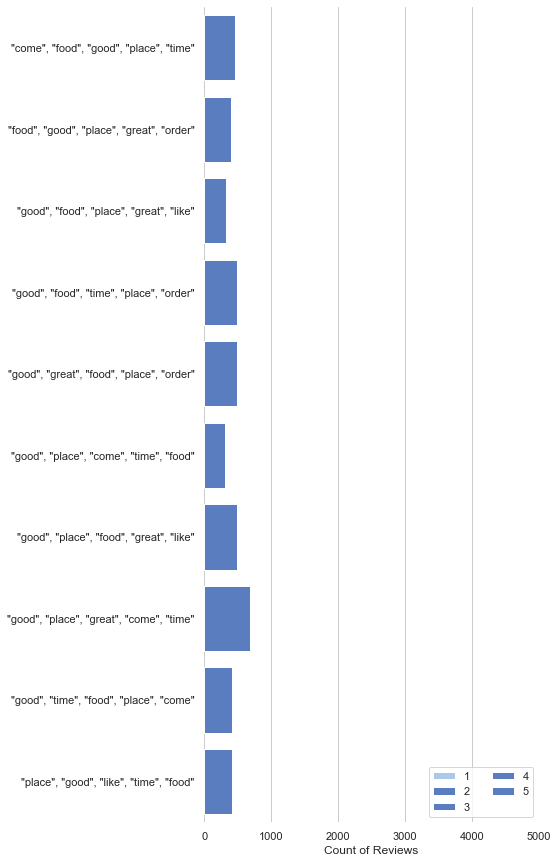

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

sns.set_color_codes('pastel')
sns.barplot(x='1', y='primary_topic', data=agg, label="1", color="b")

sns.set_color_codes('muted')
sns.barplot(x='2', y='primary_topic', data=agg, label="2", color="b")

sns.set_color_codes('muted')
sns.barplot(x='3', y='primary_topic', data=agg, label="3", color="b")

sns.set_color_codes('muted')
sns.barplot(x='4', y='primary_topic', data=agg, label="4", color="b")

sns.set_color_codes('muted')
sns.barplot(x='5', y='primary_topic', data=agg, label="5", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0,5000), ylabel="", xlabel="Count of Reviews")
sns.despine(left=True, bottom=True)